<a href="https://colab.research.google.com/github/EmmanuelECCI/tensorflow_studies/blob/main/Transferlearning_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
#import os

#import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub


from tensorflow import keras

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/174131220_c853df1287.jpg'),
 PosixPath('datasets/flower_photos/daisy/4993492878_11fd4f5d12.jpg'),
 PosixPath('datasets/flower_photos/daisy/4540555191_3254dc4608_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4820415253_15bc3b6833_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/367020749_3c9a652d75.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/22325299158_6e32e599f8_m.jpg')]

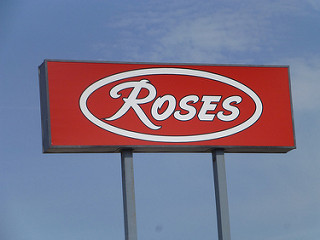

In [ ]:
Image.open(str(roses[0]))

[PosixPath('datasets/flower_photos/tulips/4550805310_5f81c9ba08_n.jpg'), PosixPath('datasets/flower_photos/tulips/4604272150_0c92385530_n.jpg'), PosixPath('datasets/flower_photos/tulips/8673416556_639f5c88f1_n.jpg'), PosixPath('datasets/flower_photos/tulips/15049902081_dd85361f8c_m.jpg'), PosixPath('datasets/flower_photos/tulips/13289268363_b9337d751e.jpg'), PosixPath('datasets/flower_photos/tulips/14487943607_651e8062a1_m.jpg'), PosixPath('datasets/flower_photos/tulips/16265883604_92be82b973.jpg'), PosixPath('datasets/flower_photos/tulips/7136973281_b2a935ce20.jpg'), PosixPath('datasets/flower_photos/tulips/2434178332_7fcf85aa95_n.jpg'), PosixPath('datasets/flower_photos/tulips/8712268519_f4c2c39a06_n.jpg'), PosixPath('datasets/flower_photos/tulips/3991742794_edebc6c8a0_n.jpg'), PosixPath('datasets/flower_photos/tulips/14278331403_4c475f9a9b.jpg'), PosixPath('datasets/flower_photos/tulips/8713389178_66bceb71a8_n.jpg'), PosixPath('datasets/flower_photos/tulips/2254152047_d3bf8903cd_n.j

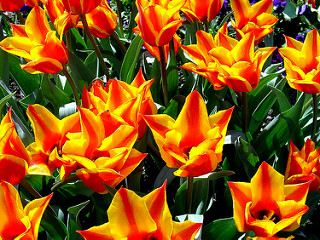

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
print(tulips)
Image.open(str(tulips[10]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
# Image.open(str(flowers_images_dict['daisy'][2]))
def plot_sample(label, number):
    image_path = str(flowers_images_dict[label][number])
    image = Image.open(image_path)
    image.show()


In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(224,224))
      X.append(resized_img)
      y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)/ 255
y = np.array(y)/ 255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train 
X_test_scaled = X_test 

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=(224, 224, 3))
])

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5", input_shape=(224, 224, 3))
])
#m.build([None, 224, 224, 3])  # Batch input shape.

In [ ]:
plt.imshow(X[1])

In [ ]:
predicted = m.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([472, 145, 645])

In [ ]:
file_path = '/content/ImageNetLabels.txt'  # Replace with the actual file path

with open(file_path, 'r') as file:
    labels = file.read().splitlines()

In [ ]:
labels[472]

'cannon'

In [ ]:
num_of_flowers = 5

# Load the pre-trained MobileNetV2 model without the top layer
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


model_mobilenet_v3 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model_mobilenet_v3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 4,232,837
Trainable params: 6,405
Non-trainable params: 4,226,432
_________________________________________________________________


In [ ]:
# Compile the model
model_mobilenet_v3.summary()
model_mobilenet_v3.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 4,232,837
Trainable params: 6,405
Non-trainable params: 4,226,432
_________________________________________________________________


In [ ]:
tb_callback_mobilenet_v3 = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

# Train the model
model_mobilenet_v3.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32,callbacks=[tb_callback_mobilenet_v3])

Epoch 1/10
86/86 [==============================] - 26s 138ms/step - loss: 0.6872 - acc: 0.7493 - val_loss: 0.3923 - val_acc: 0.8584
Epoch 2/10
86/86 [==============================] - 11s 125ms/step - loss: 0.3235 - acc: 0.8917 - val_loss: 0.3168 - val_acc: 0.8943
Epoch 3/10
86/86 [==============================] - 7s 79ms/step - loss: 0.2459 - acc: 0.9266 - val_loss: 0.2874 - val_acc: 0.8998
Epoch 4/10
86/86 [==============================] - 7s 79ms/step - loss: 0.1978 - acc: 0.9411 - val_loss: 0.2717 - val_acc: 0.9063
Epoch 5/10
86/86 [==============================] - 7s 85ms/step - loss: 0.1639 - acc: 0.9578 - val_loss: 0.2611 - val_acc: 0.9074
Epoch 6/10
86/86 [==============================] - 7s 78ms/step - loss: 0.1385 - acc: 0.9680 - val_loss: 0.2528 - val_acc: 0.9085
Epoch 7/10
86/86 [==============================] - 8s 93ms/step - loss: 0.1196 - acc: 0.9771 - val_loss: 0.2485 - val_acc: 0.9139
Epoch 8/10
86/86 [==============================] - 7s 77ms/step - loss: 0.1041

In [ ]:
num_of_flowers = 5

# Load the pre-trained MobileNetV2 model without the top layer
feature_extractor_model_2 = "https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5"
pretrained_model_without_top_layer_2 = hub.KerasLayer(feature_extractor_model_2, input_shape=(224, 224, 3), trainable=False)


model_resnet_v2_152 = tf.keras.Sequential([
  pretrained_model_without_top_layer_2,
  tf.keras.layers.Dense(num_of_flowers)
])

model_resnet_v2_152.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 58,341,893
Trainable params: 10,245
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
# Compile the model
model_resnet_v2_152.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [ ]:
#tb_callback_model_resnet_v2_152 = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1) / callbacks=[tb_callback_model_resnet_v2_152]

# Train the model
model_resnet_v2_152.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32)

Epoch 1/10
86/86 [==============================] - 54s 353ms/step - loss: 0.6968 - acc: 0.7376 - val_loss: 0.4605 - val_acc: 0.8399
Epoch 2/10
86/86 [==============================] - 28s 332ms/step - loss: 0.3589 - acc: 0.8732 - val_loss: 0.3948 - val_acc: 0.8606
Epoch 3/10
86/86 [==============================] - 29s 336ms/step - loss: 0.2673 - acc: 0.9106 - val_loss: 0.3856 - val_acc: 0.8595
Epoch 4/10
86/86 [==============================] - 29s 341ms/step - loss: 0.2149 - acc: 0.9310 - val_loss: 0.3626 - val_acc: 0.8736
Epoch 5/10
86/86 [==============================] - 30s 345ms/step - loss: 0.1790 - acc: 0.9539 - val_loss: 0.3575 - val_acc: 0.8704
Epoch 6/10
86/86 [==============================] - 25s 297ms/step - loss: 0.1527 - acc: 0.9640 - val_loss: 0.3486 - val_acc: 0.8791
Epoch 7/10
86/86 [==============================] - 26s 298ms/step - loss: 0.1363 - acc: 0.9669 - val_loss: 0.3484 - val_acc: 0.8856
Epoch 8/10
86/86 [==============================] - 29s 344ms/step - 

In [ ]:
predicted = model_resnet_v2_152.predict(np.array([X_test_scaled[50], X_test_scaled[100], X_test_scaled[200]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 35ms/step


array([0, 2, 4])

In [ ]:
X_test_scaled[0].shape

(224, 224, 3)

In [ ]:
plt.imshow(X_test_scaled[200])

In [ ]:
import cv2
import numpy as np
import pathlib
import tensorflow as tf
from sklearn.model_selection import train_test_split



import PIL.Image as Image
#import os

#import matplotlib.pyplot as plt


import tensorflow_hub as hub


from tensorflow import keras







# Download and extract the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir = pathlib.Path(data_dir)

# Define the dictionary of flower images and labels
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

# Initialize X and y lists
X, y = [], []

# Process images in batches
batch_size = 80  # Adjust this value based on available memory
for flower_name, images in flowers_images_dict.items():
    for idx in range(0, len(images), batch_size):
        batch_images = images[idx : idx + batch_size]
        for image in batch_images:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img, (224, 224))
            X.append(resized_img)
            y.append(flowers_labels_dict[flower_name])

    # Convert processed batch to NumPy arrays incrementally
    X_batch = np.array(X) / 255
    y_batch = np.array(y) / 255

    # Concatenate the batch data with the existing data
    if 'X_train' not in locals():
        X_train = X_batch
        y_train = y_batch
    else:
        X_train = np.concatenate((X_train, X_batch), axis=0)
        y_train = np.concatenate((y_train, y_batch), axis=0)

    # Clear the batch lists for the next iteration
    X.clear()
    y.clear()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0)


In [ ]:
import gc

# ...

# Clear variables and lists
del img, resized_img
X.clear()
y.clear()

# Perform garbage collection
gc.collect()

In [ ]:
cnn_flowers = tf.keras.models.Sequential([
    
    #cnn
    tf.keras.layers.Conv2D(filters=32 ,kernel_size= (3, 3), activation='relu', input_shape=(224, 224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64 ,kernel_size= (3, 3), activation='relu' ),
    tf.keras.layers.MaxPooling2D((2,2)),
    #dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
    ])

#model_hidden_3 = tf.keras.Model(inputs=inputs, outputs=outputs)

tb_callback_cnn_flowers = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
cnn_flowers.summary()
cnn_flowers.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
            )

cnn_flowers.fit(X_train, y_train, epochs=10, callbacks=[tb_callback_cnn_flowers], validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 32)                5